# Matplotlib

Matplotlib is the go-to package for visualization in the Scientific Python stack. It is perhaps the least popular of all the scientific packages since it aims to replicate the Matlab plotting API, a design which often clashes with more idiomatic Pythonic code. In short, it often looks ugly. However, while other visualization packages exist, Matplotlib remains ubiquitous, so we might as well have a look.

If you use matplotlib in a Jupyter notebook, you should make sure to run the following line, which makes plots "automagically" appear in the notebook.

In [121]:
%matplotlib inline

The *recommended* way to use Matplotlib is to import the `pyplot` submodule with the `plt` name, like this:

In [122]:
from matplotlib import pyplot as plt

We will also need Numpy.

In [123]:
import numpy as np

With that, we are good to go. Plotting in Matplotlib usually involves calling several functions in the `plt` module, followed by `plt.show()` to display the final product. Expect a significant amount of back-and-forth to produce something that actually looks *good*, however.

Note that in this notebook we do **not** need to call `plt.show()` so long as all our plotting code is confined to one cell. This is due to Jupyter "magic". If you use Matplotlib in regular code, don't forget `plt.show()` though.

## Basic line plots

The `plt.plot()` function works similarly to Matlab's `plot`. It takes two arrays of `x` and `y` values.

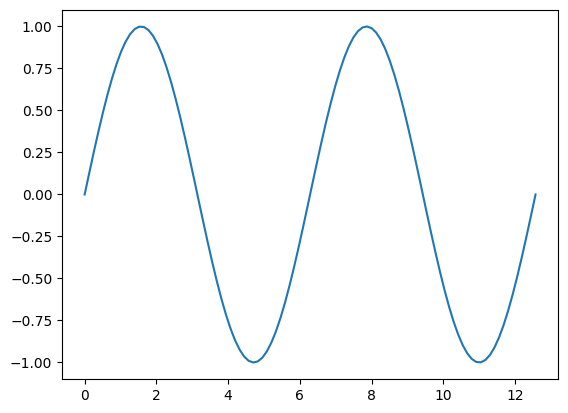

In [124]:
xpts = np.linspace(0, 4*np.pi, 100)
ypts = np.sin(xpts)
plt.plot(xpts, ypts)

That's simple enough. The `plot` function accepts a number of optional arguments to tweak the details.

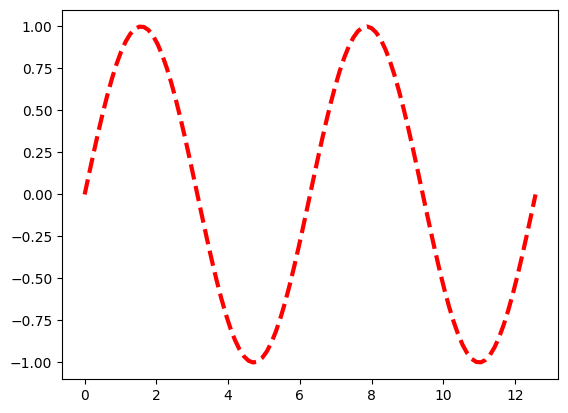

In [125]:
plt.plot(xpts, ypts, color='red', linewidth=3, linestyle='dashed')

You can see the full range of options by running `plt.plot?` in IPython or the Jupyter notebook, or by going to the [official documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot). In fact, why don't you just keep that page open.

You can call `plt.plot` multiple times.

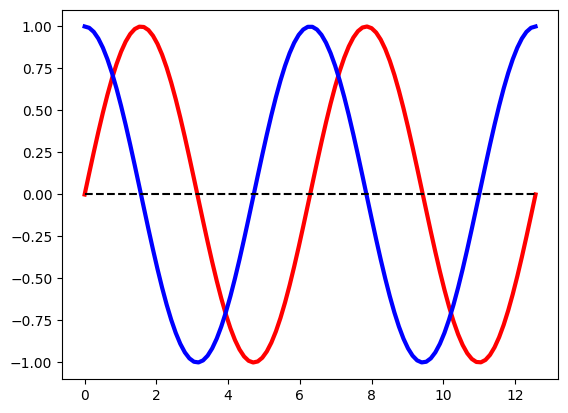

In [126]:
plt.plot(xpts, np.sin(xpts), color='red', linewidth=3)
plt.plot(xpts, np.cos(xpts), color='blue', linewidth=3)
plt.plot(xpts, np.zeros_like(xpts), color='black', linestyle='dashed')

Let's add a legend to help out the viewer.

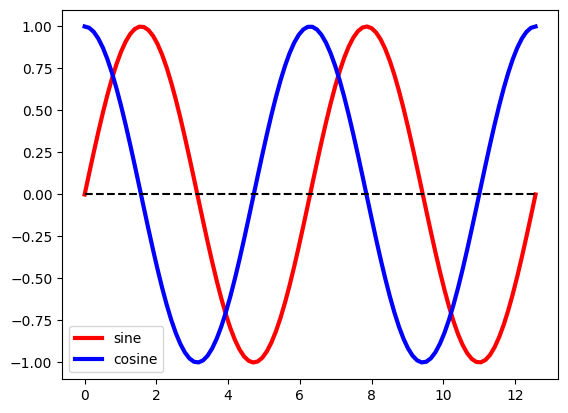

In [127]:
plt.plot(xpts, np.sin(xpts), color='red', linewidth=3)
plt.plot(xpts, np.cos(xpts), color='blue', linewidth=3)
plt.plot(xpts, np.zeros_like(xpts), color='black', linestyle='dashed')
plt.legend(['sine', 'cosine'])

By default the legend picks the first two lines that were drawn. However we can (and should) make this more explicit. Note the comma after `sine` and `cosine`, since the return value of `plt.plot` is a list of lines, rather than a single line. (This is unpacking again!)

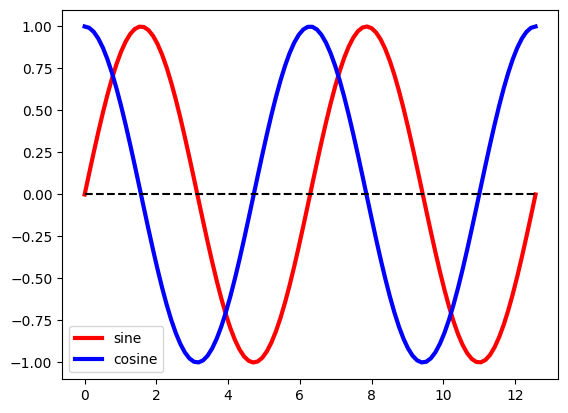

In [128]:
sine, = plt.plot(xpts, np.sin(xpts), color='red', linewidth=3)
cosine, = plt.plot(xpts, np.cos(xpts), color='blue', linewidth=3)
plt.plot(xpts, np.zeros_like(xpts), color='black', linestyle='dashed')
plt.legend([sine, cosine], ['sine', 'cosine'])

This also works, and is maybe the best way to do it.

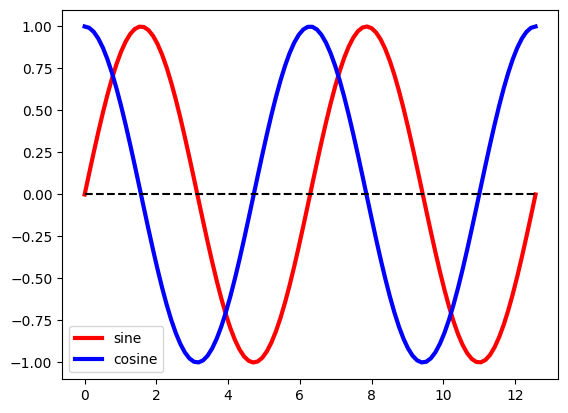

In [129]:
sine, = plt.plot(xpts, np.sin(xpts), color='red', linewidth=3)
sine.set_label('sine')
cosine, = plt.plot(xpts, np.cos(xpts), color='blue', linewidth=3)
cosine.set_label('cosine')
plt.plot(xpts, np.zeros_like(xpts), color='black', linestyle='dashed')
plt.legend()

Another common task is to change the view. Let's adjust the x-axis so that there are no margins on the left and right.

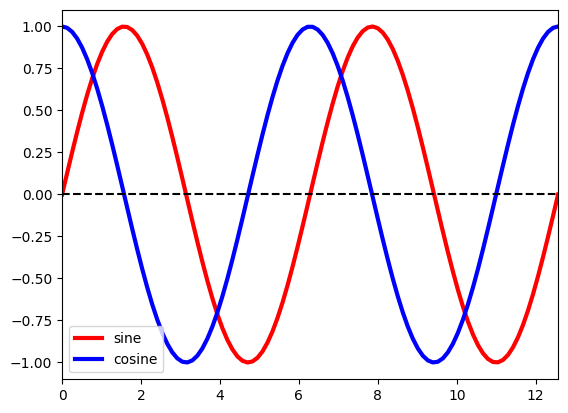

In [130]:
sine, = plt.plot(xpts, np.sin(xpts), color='red', linewidth=3)
sine.set_label('sine')
cosine, = plt.plot(xpts, np.cos(xpts), color='blue', linewidth=3)
cosine.set_label('cosine')
plt.plot(xpts, np.zeros_like(xpts), color='black', linestyle='dashed')
plt.xlim(xpts[0], xpts[-1])
plt.legend()

How about making this a bit bigger? We need to explicitly create a new figure by calling `plt.figure`. This will have the added benefit of giving our legend a bit of room to breathe.

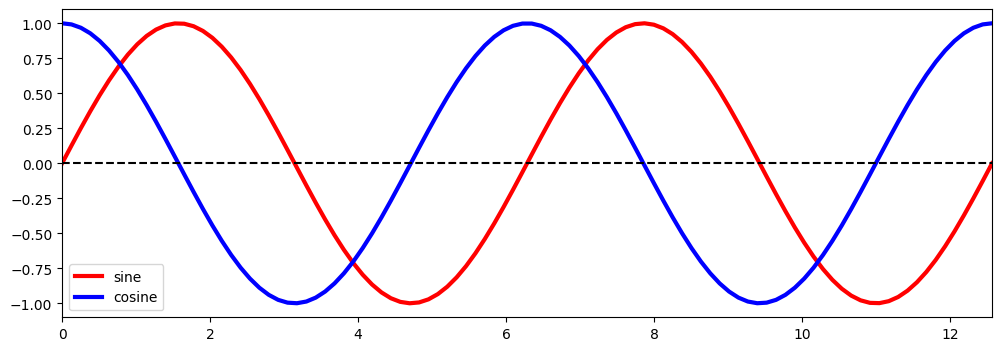

In [131]:
plt.figure(figsize=(12,4))
sine, = plt.plot(xpts, np.sin(xpts), color='red', linewidth=3)
sine.set_label('sine')
cosine, = plt.plot(xpts, np.cos(xpts), color='blue', linewidth=3)
cosine.set_label('cosine')
plt.plot(xpts, np.zeros_like(xpts), color='black', linestyle='dashed')
plt.xlim(xpts[0], xpts[-1])
plt.legend()

Now let's add labels to the axes and a title.

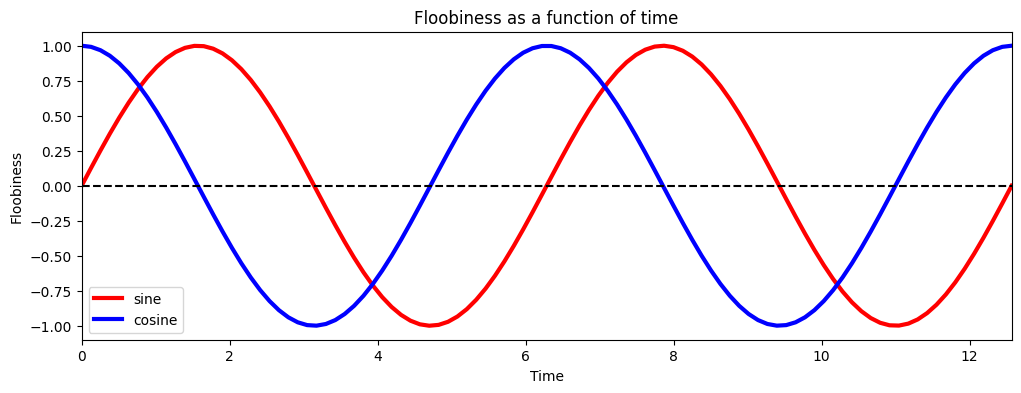

In [132]:
plt.figure(figsize=(12,4))
sine, = plt.plot(xpts, np.sin(xpts), color='red', linewidth=3)
sine.set_label('sine')
cosine, = plt.plot(xpts, np.cos(xpts), color='blue', linewidth=3)
cosine.set_label('cosine')
plt.plot(xpts, np.zeros_like(xpts), color='black', linestyle='dashed')
plt.xlim(xpts[0], xpts[-1])
plt.xlabel('Time')
plt.ylabel('Floobiness')
plt.title('Floobiness as a function of time')
plt.legend()

Instead of that manual dashed line we can add a grid instead.

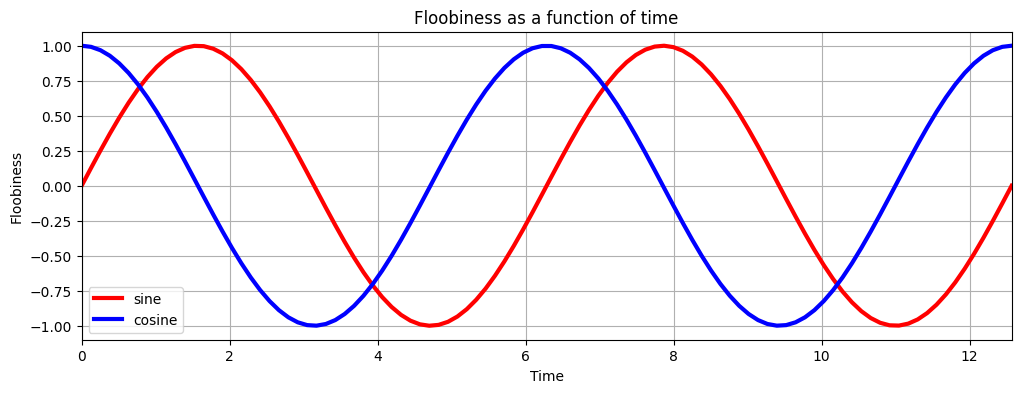

In [133]:
plt.figure(figsize=(12,4))
sine, = plt.plot(xpts, np.sin(xpts), color='red', linewidth=3)
sine.set_label('sine')
cosine, = plt.plot(xpts, np.cos(xpts), color='blue', linewidth=3)
cosine.set_label('cosine')
plt.xlim(xpts[0], xpts[-1])
plt.xlabel('Time')
plt.ylabel('Floobiness')
plt.title('Floobiness as a function of time')
plt.grid()
plt.legend()

We can further decorate by highlighting regions or particular lines, for example:

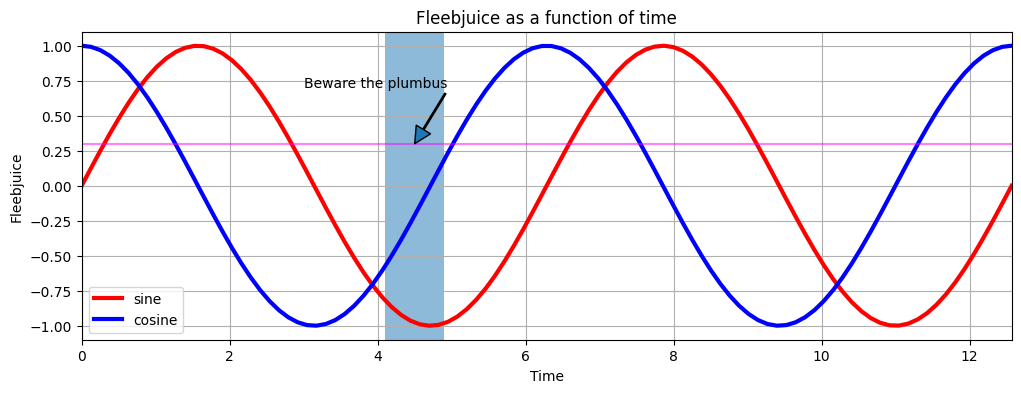

In [134]:
plt.figure(figsize=(12,4))
sine, = plt.plot(xpts, np.sin(xpts), color='red', linewidth=3)
sine.set_label('sine')
cosine, = plt.plot(xpts, np.cos(xpts), color='blue', linewidth=3)
cosine.set_label('cosine')
plt.xlim(xpts[0], xpts[-1])
plt.xlabel('Time')
plt.ylabel('Fleebjuice')
plt.title('Fleebjuice as a function of time')
plt.grid()
plt.axvspan(4.1, 4.9, alpha=0.5)
plt.axhline(0.3, color='magenta', alpha=0.5)
plt.annotate('Beware the plumbus', (4.5, 0.3), (3.0, 0.7), arrowprops={'width': 1})
plt.legend()

The remainder of this notebook serves as a tour of miscellaneous things that Matplotlib can do. Although the full power of Matplotlib is far greater than what is shown here, this will hopefully suffice for the current course.

## Logarithmic plots

As every scientist knows, there is no greater shame in this world than to present a plot in a linear scale that should be in a logarithmic scale, or vice versa. Matplotlib naturally offers both. Using `grid(which='both')` is often useful to illustrate the logarithmic nature of a log plot.

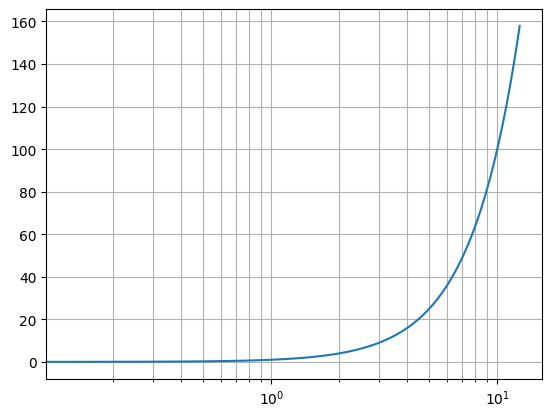

In [135]:
plt.semilogx(xpts, xpts**2)                  # Logarithmic in x
plt.grid(which='both')

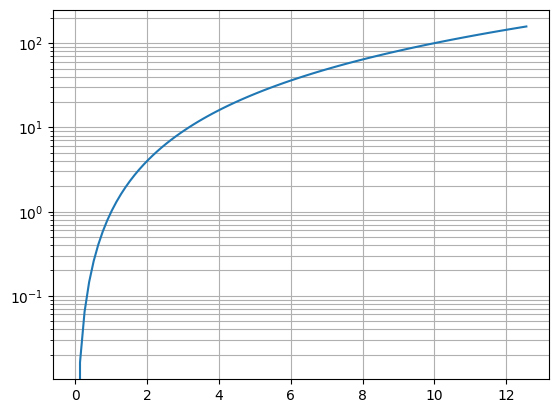

In [136]:
plt.semilogy(xpts, xpts**2)                  # Logarithmic in y
plt.grid(which='both')

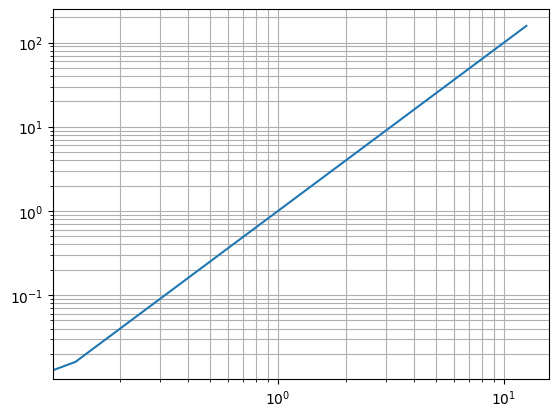

In [137]:
plt.loglog(xpts, xpts**2)                    # Logarithmic in both
plt.grid(which='both')

## Bar plots

As dull and finance-like as they may be, they are sometimes necessary. Let's plot some random data.

<BarContainer object of 10 artists>

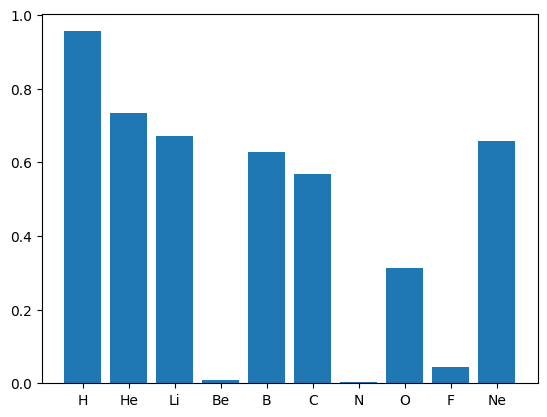

In [138]:
data = np.random.rand(10)
plt.bar(np.arange(10), data, tick_label=['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne'])

## Stem plots

<StemContainer object of 3 artists>

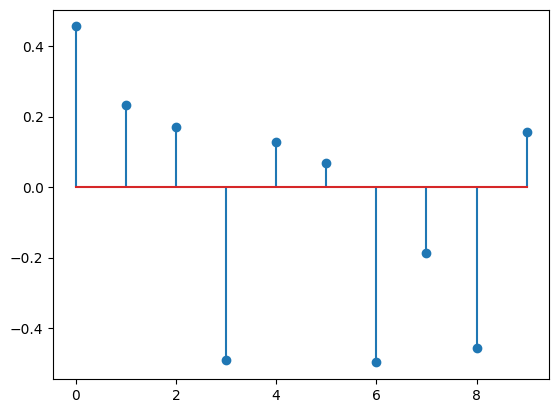

In [139]:
plt.stem(np.arange(10), data - 0.5)

## Histograms

To plot a histogram, let us first sample a random distribution to get some data to plot. Fortunately, Numpy can do that, too. Let's draw ten thousand samples from a normal distribution.

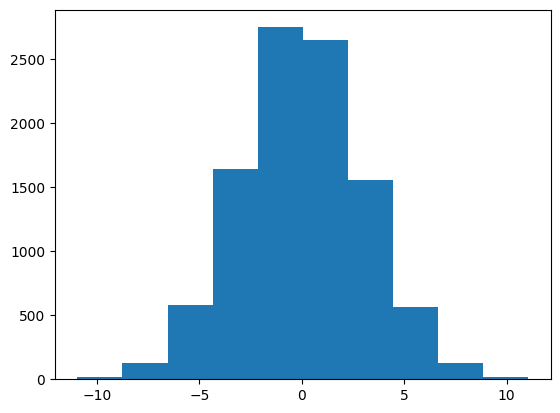

In [140]:
data = np.random.normal(loc=0, scale=3, size=10000)
plt.hist(data);

You can modify the number of bins to something more sensible. We can also use `rwidth` to slightly slim the bars a little.

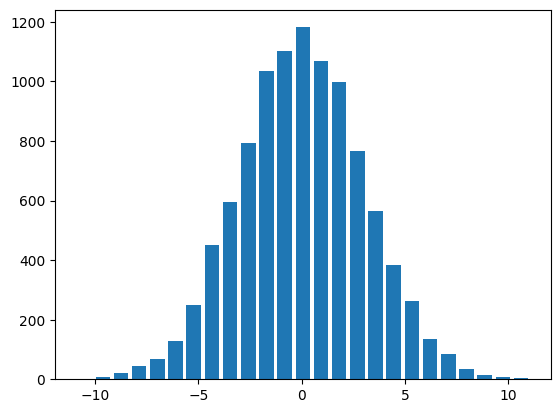

In [141]:
plt.hist(data, bins=25, rwidth=0.8);

## Box plots

Let us use a box plot to illustrate the difference between a number of different probability distributions. We'll draw a thousand samples from each distribution.

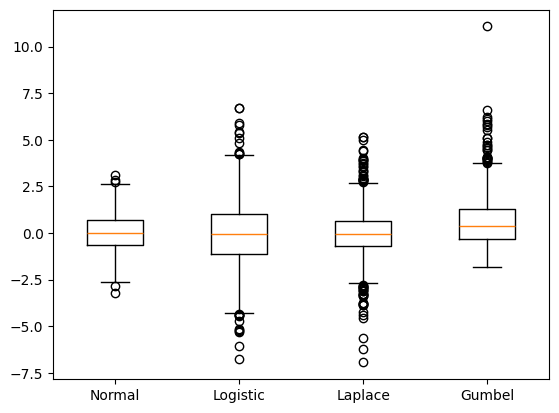

In [142]:
N = 1000
data = np.array([
    np.random.standard_normal(N),
    np.random.logistic(size=N),
    np.random.laplace(size=N),
    np.random.gumbel(size=N),
]).T

plt.boxplot(data, labels=['Normal', 'Logistic', 'Laplace', 'Gumbel']);

## Scatter plots

Scatter plots are very useful in data analysis to reveal coupling between two data sources. For example, let us create a two-dimensional multi-normal distribution.

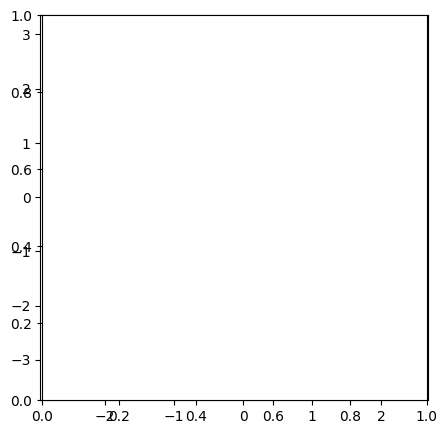

In [143]:
# First create a random symmetric positive definite covariance matrix and mean
cov = np.random.rand(2,2)
cov = cov.T @ cov
mean = np.zeros((2,))

# Sample the distribution and plot
plt.figure(figsize=(5,5))
data = np.random.multivariate_normal(mean, cov, 1000)
plt.scatter(data.T[0], data.T[1], alpha=0.6)

# Plot the principal directions, too
eigvals, eigvecs = np.linalg.eigh(cov)
eigvecs *= np.sqrt(eigvals) * 3
plt.arrow(0, 0, *eigvecs.T[0], head_width=0.15, fc='pink', ec='red')
plt.arrow(0, 0, *eigvecs.T[1], head_width=0.15, fc='pink', ec='red')

# We need equal aspect ratio
plt.axes().set_aspect('equal')

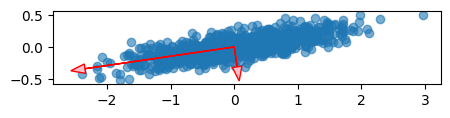

In [144]:
# First create a random symmetric positive definite covariance matrix and mean
cov = np.random.rand(2,2)
cov = cov.T @ cov
mean = np.zeros((2,))

# Sample the distribution and plot
plt.figure(figsize=(5,5))
data = np.random.multivariate_normal(mean, cov, 1000)
plt.scatter(data.T[0], data.T[1], alpha=0.6)

# Plot the principal directions, too
eigvals, eigvecs = np.linalg.eigh(cov)
eigvecs *= np.sqrt(eigvals) * 3
plt.arrow(0, 0, *eigvecs.T[0], head_width=0.15, fc='pink', ec='red')
plt.arrow(0, 0, *eigvecs.T[1], head_width=0.15, fc='pink', ec='red')

# We need equal aspect ratio
plt.gca().set_aspect('equal')